# Réduction de dimension: la PCA

PCA = Principal Component Analysis, soit analyse en composante principale.

Le but c'est de réduire la dimension des données.

- Visualiser les données en 2D ou 3D,
- réduire le temps de calcul lors de l'apprentissage,
- réduire la taille des modèles.

![PCA](../pca_1.png)


In [1]:
import pandas as pd

df = pd.read_csv("../../all_data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
import seaborn as sn
sn.pairplot(data=df, hue="species", diag_kind="hist")

In [3]:
# on applique une PCA pour réduire les 4 dimensions en 2 dimensions
from sklearn.decomposition import PCA

# on instancie l'algorithme avec le nombre de dimensions voulues
pca = PCA(n_components=2)

# on récupère les données: X
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = df[["species"]]
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
X_pca = pd.DataFrame(pca.transform(X))
X_pca["species"] = Y
X_pca.head()

,0,1,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


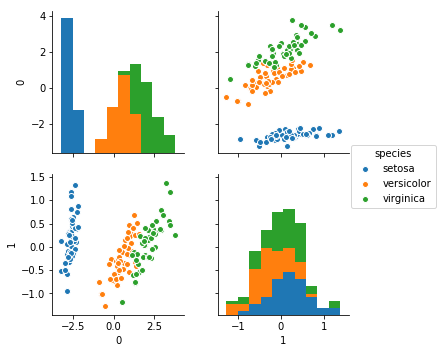

In [5]:
sn.pairplot(data=X_pca, hue="species")

train 480
test 120
pipeline Naive Bayes Gaussian
duration 0 secondes
ratio: 0.8333333333333334
pipeline Linear SVC
duration 0 secondes
ratio: 0.9333333333333333
pipeline SVC kernel rbf
duration 0 secondes
ratio: 1.0
pipeline SVC kernel poly d=1
duration 0 secondes
ratio: 1.0
pipeline SVC kernel poly d=2
duration 0 secondes
ratio: 0.8333333333333334
pipeline KNN
duration 0 secondes
ratio: 1.0


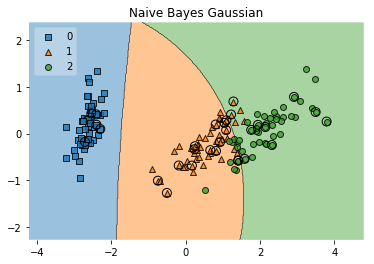

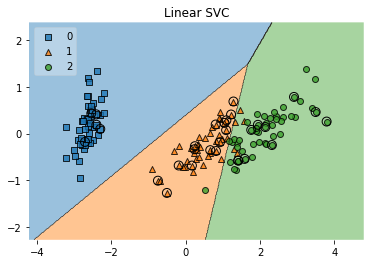

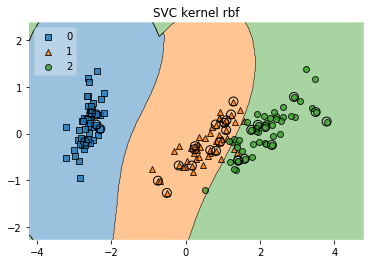

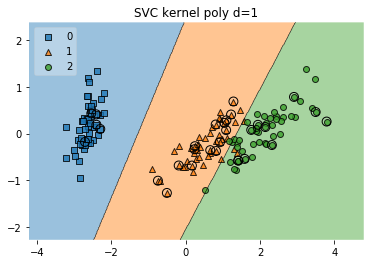

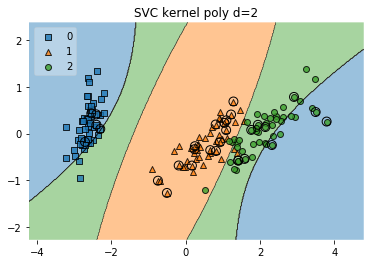

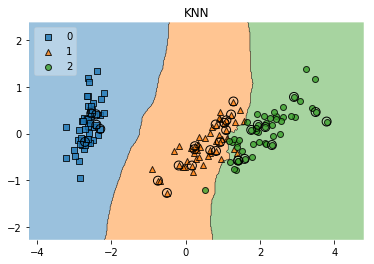

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import NuSVC, SVC, LinearSVC
import numpy as np
from datetime import datetime

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# on test le naive bayes et les différents SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

pca_2d = PCA(n_components=2)

pipelines = [
    # Pipeline([("PCA 2D", pca_2d), ("Naive Bayes Multinomial", MultinomialNB())]), 
    Pipeline([("PCA 2D", pca_2d), ("Naive Bayes Gaussian", GaussianNB())]), 
    Pipeline([("PCA 2D", pca_2d), ("Linear SVC", LinearSVC())]),
    Pipeline([("PCA 2D", pca_2d), ("SVC kernel rbf", SVC(kernel="rbf"))]),
    Pipeline([("PCA 2D", pca_2d), ("SVC kernel poly d=1", SVC(kernel="poly", degree=1))]),
    Pipeline([("PCA 2D", pca_2d), ("SVC kernel poly d=2", SVC(kernel="poly", degree=2))]),
    Pipeline([("PCA 2D", pca_2d), ("KNN", KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree"))]),
]

# on divise l'échantillon
X_train, X_test, Y_train, Y_test = train_test_split(
    df[["petal_length", "petal_width", "sepal_length", "sepal_width"]], df["species"], 
    shuffle=True, test_size=0.2, train_size=None)

print("train", X_train.size)
print("test", X_test.size)


# on convertit la "DataFrame" de pandas en numpy Array
X = df[["petal_length", "petal_width", "sepal_length", "sepal_width"]].values
Y = df["species"].values
Y_as_int = np.empty(shape=Y.shape, dtype=int)
# on convertit les classes en entiers: "setosa" -> 0, "versicolor" -> 1
for i,value in enumerate(Y):
    if Y[i] == "setosa":
        Y_as_int[i] = 0
    elif Y[i] == "versicolor":
        Y_as_int[i] = 1
    else:
        Y_as_int[i] = 2
    
for i,pipeline in enumerate(pipelines):
    # print("-"*50)
    start = datetime.now()
    pipeline_name = pipeline.steps[1][0]
    print("pipeline", pipeline_name)
    # print("start training")
    pipeline.fit(X_train, Y_train)
    print("duration", (datetime.now() - start).seconds, "secondes")
    # on prédit sur l'échantillon de test
    predicted = pipeline.predict(X_test)
    
    # on affiche les résultats
    # print("correct ones", np.sum(predicted == Y_test))
    # print("false ones", np.sum(predicted != Y_test))
    print("ratio:", np.mean(predicted == Y_test))
    
    # on relance le pipeline pour afficher les frontières des régions
    # la fonction plot_decision_regions à besoin des classes sous forme d'entiers
    # d'ou le Y_as_int.
    clf = pipeline.steps[1][1]
    fig = plt.figure()
    plt.title(pipeline_name)
    pipeline.fit(X, Y_as_int)
    plot_decision_regions(X=pca_2d.transform(X), y=Y_as_int, clf=clf, legend=2, 
                          X_highlight=pca_2d.transform(X_test))


## Comparaison avec apprentissage en 4D

On utilise toutes les données d'entrée: largeure/Longueur des pétales et sepal.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import NuSVC, SVC, LinearSVC
import numpy as np
from datetime import datetime

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# on test le naive bayes et les différents SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


pipelines = [
    Pipeline([("Naive Bayes Multinomial", MultinomialNB())]), 
    Pipeline([("Naive Bayes Gaussian", GaussianNB())]), 
    Pipeline([("Linear SVC", LinearSVC())]),
    Pipeline([("SVC kernel rbf", SVC(kernel="rbf"))]),
    Pipeline([("SVC kernel poly d=1", SVC(kernel="poly", degree=1))]),
    Pipeline([("SVC kernel poly d=2", SVC(kernel="poly", degree=2))]),
    Pipeline([("KNN", KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree"))]),
]

# on divise l'échantillon
X_train, X_test, Y_train, Y_test = train_test_split(
    df[["petal_length", "petal_width", "sepal_length", "sepal_width"]], df["species"], 
    shuffle=True, test_size=0.2, train_size=None)

print("train", X_train.size)
print("test", X_test.size)


# on convertit la "DataFrame" de pandas en numpy Array
X = df[["petal_length", "petal_width", "sepal_length", "sepal_width"]].values
Y = df["species"].values
Y_as_int = np.empty(shape=Y.shape, dtype=int)
# on convertit les classes en entiers: "setosa" -> 0, "versicolor" -> 1
for i,value in enumerate(Y):
    if Y[i] == "setosa":
        Y_as_int[i] = 0
    elif Y[i] == "versicolor":
        Y_as_int[i] = 1
    else:
        Y_as_int[i] = 2
    
for i,pipeline in enumerate(pipelines):
    # print("-"*50)
    start = datetime.now()
    pipeline_name = pipeline.steps[0][0]
    print("pipeline", pipeline_name)
    # print("start training")
    pipeline.fit(X_train, Y_train)
    print("duration", (datetime.now() - start).seconds, "secondes")
    # on prédit sur l'échantillon de test
    predicted = pipeline.predict(X_test)
    
    # on affiche les résultats
    # print("correct ones", np.sum(predicted == Y_test))
    # print("false ones", np.sum(predicted != Y_test))
    print("ratio:", np.mean(predicted == Y_test))


train 480
test 120
pipeline Naive Bayes Multinomial
duration 0 secondes
ratio: 0.4666666666666667
pipeline Naive Bayes Gaussian
duration 0 secondes
ratio: 0.8666666666666667
pipeline Linear SVC
duration 0 secondes
ratio: 0.9
pipeline SVC kernel rbf
duration 0 secondes
ratio: 0.9333333333333333
pipeline SVC kernel poly d=1
duration 0 secondes
ratio: 0.9333333333333333
pipeline SVC kernel poly d=2
duration 0 secondes
ratio: 0.9
pipeline KNN
duration 0 secondes
ratio: 0.9


## On teste la PCA  sur les données textuelles du projet DataType

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


ref = {
    "0": "float",
    "1": "int",
    "2": "Code postal",
    "3": "Coordonnées GPS",
    "4": "Adresse",
    "5": "SIRET",
    "6": "Année",
    "7": "Date",
    "8": "SIREN",
    "9": "Code NAF",
    "10": "Autre",
    "11": "Telephone",
}

y_vector = []
raw_documents_vector = []

file_name = "./data/data_for_project_datatype.txt"
with open(file_name, "rt") as f:
    for i,line in enumerate(f):
        data = line.split(" ", maxsplit=1)
        y = data[0]
        text = data[1].strip()
        raw_document = str(len(text)) + " " + text
        if y != "" and raw_document != "":
            y_vector.append(y)
            raw_documents_vector.append(raw_document)

print(len(y_vector), "données")

# on construit le pipeline
NGRAM_RANGE = (1, 3)
count_vectorizer = CountVectorizer(
    input="content", 
    analyzer="char_wb", 
    ngram_range=NGRAM_RANGE, 
    stop_words=None,
    binary=True)

368778 données


In [9]:
count_vectorizer.fit(raw_documents_vector)

CountVectorizer(analyzer='char_wb', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
X = count_vectorizer.transform(raw_documents_vector)

In [11]:
print(type(X))
print(X.shape)
print(raw_documents_vector[0])
# print(count_vectorizer.vocabulary_)
# print(X[0, :])

<class 'scipy.sparse.csr.csr_matrix'>
(368778, 8321)
9 435315742


In [12]:
# on instancie l'algo de PCA: pour travailler avec des données "sparse"
# on utilise l'algo TruncatedSVD qui est équivalent àe un PCA (SVD = Singular Value Decomposition)
from sklearn.decomposition import TruncatedSVD
pca_2d = TruncatedSVD(n_components=2)
pca_2d.fit(X)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [13]:
X_2d = pca_2d.transform(X)
print(X_2d.shape)
X_2d_df = pd.DataFrame(X_2d, columns=["pc1", "pc2"])
X_2d_df["classes"] = y_vector
X_2d_df.columns
print(ref)

(368778, 2)
{'0': 'float', '1': 'int', '2': 'Code postal', '3': 'Coordonnées GPS', '4': 'Adresse', '5': 'SIRET', '6': 'Année', '7': 'Date', '8': 'SIREN', '9': 'Code NAF', '10': 'Autre', '11': 'Telephone'}


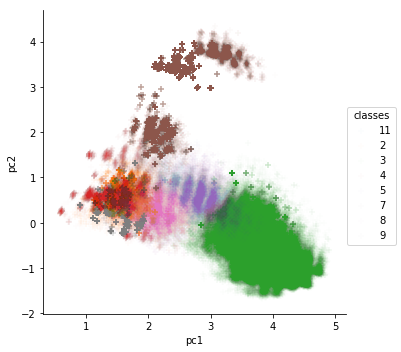

In [14]:
sn.lmplot(x="pc1",y="pc2",data=X_2d_df, hue="classes", fit_reg=False, 
          scatter_kws={"alpha": 0.01}, markers="+")

## On affiche le score de classification par Naive Bayes en fonction du nombre de dimension PCA

In [15]:


# on construit le pipeline
NGRAM_RANGE = (1, 3)
count_vectorizer = CountVectorizer(
    input="content", 
    analyzer="char_wb", 
    ngram_range=NGRAM_RANGE, 
    stop_words=None,
    binary=True)

print("vectorizing")
count_vectorizer.fit(raw_documents_vector)
X = count_vectorizer.transform(raw_documents_vector)
print("done !")


vectorizing
done !


In [16]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [17]:
# on prépare les données d'entrainement et de test
X_train, X_test, Y_train, Y_test =  train_test_split(
    X, 
    y_vector, 
    shuffle=True, 
    test_size=0.25, 
    train_size=None)


In [18]:
print(type(X_train), type(Y_train))

<class 'scipy.sparse.csr.csr_matrix'> <class 'list'>


In [30]:
# on prépare le nombre de dimensions qui nous intéressent
dimensions = [100, 50, 20, 10, 8, 5, 2, 1]


dimension: 100
start training...
ratio: 0.9858343727967894
duration 63 secondes
dimension: 50
start training...
ratio: 0.9852703508867076
duration 37 secondes
dimension: 20
start training...
ratio: 0.9714084277889257
duration 15 secondes
dimension: 10
start training...
ratio: 0.9555941211562449
duration 9 secondes
dimension: 8
start training...
ratio: 0.940810239166983
duration 8 secondes
dimension: 5
start training...
ratio: 0.9179239655078909
duration 7 secondes
dimension: 2
start training...
ratio: 0.8887032919355713
duration 6 secondes
dimension: 1
start training...
ratio: 0.8051629697922881
duration 6 secondes


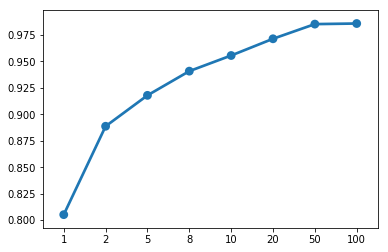

In [31]:
ratios = []
for d in dimensions:
    start = datetime.now()
    print("dimension:", d)
    pipeline = Pipeline([
        ("PCA dimension %s"%d, TruncatedSVD(n_components=d)), 
        ("Multinomial Naive Bayes", GaussianNB())
    ])
    print("start training...")
    pipeline.fit(X_train, Y_train)
    
    # on calcule la précision
    # on prédit sur l'échantillon de test
    predicted = pipeline.predict(X_test)
    ratio = np.mean(predicted == Y_test)
    ratios.append(ratio)
    print("ratio:", ratio)
    print("duration", (datetime.now() - start).seconds, "secondes")
sn.pointplot(dimensions, ratios)